# NOI: Zufallsprozesse und Quantisierung im Frequenzbereich #
## DFT von Breitbandsignalen ##

Dieses Notebook unterstützt die gleichnamige Übungsaufgabe. Thema ist die korrekte Skalierung und Interpretation der DFT von Breitbandsignalen (z.B. Rauschen) im Vergleich mit Schmalbandsignalen (z.B. Sinustöne).

In [2]:
# -*- coding: utf-8 -*-
import numpy as np
import numpy.random as rnd
from numpy import (pi, log10, exp, sqrt, sin, cos, tan, angle, arange,
                    linspace, array, zeros, ones)
from numpy.fft import fft, ifft, fftshift, ifftshift, fftfreq

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import (figure, plot, stem, grid, xlabel, ylabel,
    subplot, title, clf, xlim, ylim)

figsize = {"figsize":(15,10)}

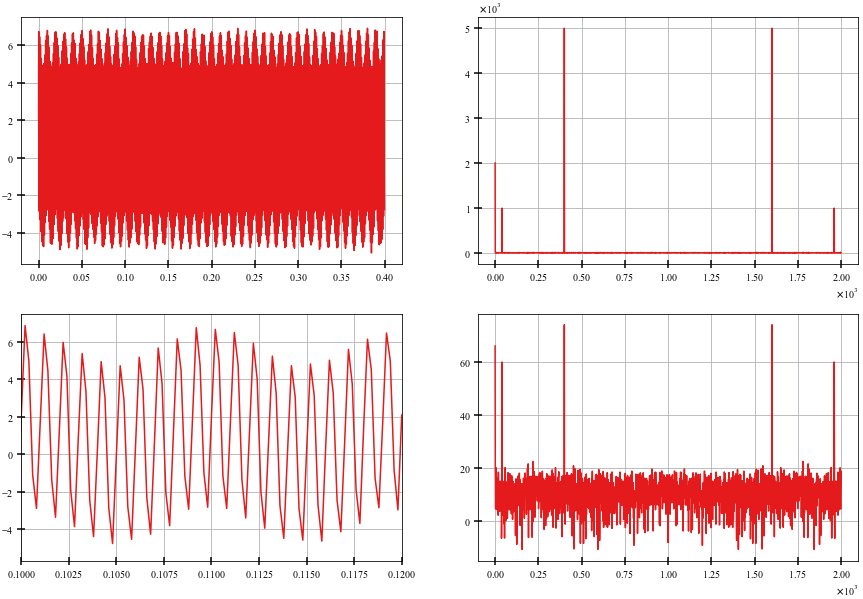

In [4]:
f_S = 5e3; T_S = 1. / f_S
N_FFT = 2000; t_max = N_FFT * T_S
f_a = 1e3; f_b = 1e2; 
A_a = 5; A_b = 1; NQ = 0.01
t = arange(0, t_max, T_S)
y = 1 + A_a * sin(2*pi*t*f_a) + A_b * cos(2*pi*t*f_b)
n = np.sqrt(NQ) * rnd.randn(len(t))
yn = y + n
Syn = fft(yn,N_FFT)
f = arange(N_FFT)
fig1 = plt.figure(1, **figsize)
gs = gridspec.GridSpec(2, 2) 
ax00 = plt.subplot(gs[0,0])
ax00.plot(t, yn)
ax01 = plt.subplot(gs[1,0])
ax01.plot(t, yn)
ax01.set_xlim((0.1,0.12))
ax02 = plt.subplot(gs[0,1])
ax02.plot(f,abs(Syn))
ax03 = plt.subplot(gs[1,1])
ax03.plot(f,20*log10(abs(Syn))); 

N = 0.010231646648977933 W = -19.900544666772603 dBW
N' = 1.0231646648977933e-05 W/Bin = -49.9005446667726 dBW/Bin
S1 = 0.5 W = -3.010299956639812 dBW
10.527325829003066
12.517286665699965


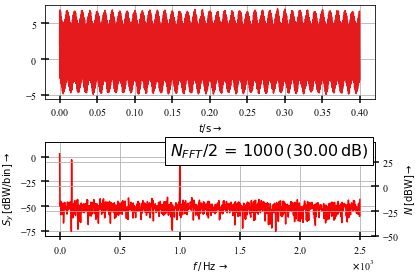

In [5]:
# -*- coding: utf-8 -*-
"""
== DFT_wideband_ML_py.py ====================================================


Python Code zu "DFT von Breitbandsignalen"


Interpretieren Sie das Ergebnis / die Leistungen in Zeit- und Frequenz-
ebene

(c) 2014-Mar-04 Christian Münker - Files zur Vorlesung "DSV auf FPGAs"
===========================================================================
"""
from __future__ import division, print_function, unicode_literals

import numpy as np
import numpy.random as rnd
from numpy import (pi, log10, exp, sqrt, sin, cos, tan, angle, arange,
                    linspace, array, zeros, ones)
from numpy.fft import fft, ifft, fftshift, ifftshift, fftfreq

import matplotlib.pyplot as plt
from matplotlib.pyplot import (figure, plot, stem, grid, xlabel, ylabel,
    subplot, title, clf, xlim, ylim)

f_S = 5e3
T_S = 1. / f_S
N_FFT = 2000
N_FFT_2 = N_FFT // 2
t_max = N_FFT * T_S
f_1 = 1e3; a_1 = 1

k_1 = int(N_FFT * f_1 / f_S) # Index Frequenz 1

t = arange(0, t_max, T_S)
f_a = 1e3; f_b = 1e2; 
A_a = 5; A_b = 1; NQ = 0.01
t = arange(0, t_max, T_S)
y = 1 + A_a * sin(2*pi*t*f_a) + A_b * cos(2*pi*t*f_b)
n = np.sqrt(NQ) * rnd.randn(len(t))
yn = y + n
N_t = sum(n*n)/len(t) # Rauschleistung, berechnet im Zeitbereich
print ('N =', N_t, 'W =', 10*log10(N_t), 'dBW')
print("N' =" , N_t / N_FFT_2, 'W/Bin =', 10*log10(N_t / N_FFT_2), 'dBW/Bin')
print ('S1 =', a_1*a_1/2, 'W =', 10*log10(a_1*a_1/2), 'dBW')
# DFT mit korrekten AMPLITUDEN für EINSEITIGES Spektrum
Syn = abs(fft(yn,N_FFT))[0:N_FFT_2]/ N_FFT_2
Nn = Syn.copy()
Nn[k_1] = Nn[k_1] - a_1
Syn = Syn * Syn / 2 # Berechne Leistung (pro bin)
Nn = Nn * Nn / 2 # Berechne Leistung (pro bin)
N_f = sum(Nn); print(N_f)

f = fftfreq(N_FFT, T_S)[0:N_FFT_2]

print (Syn[k_1])
#
fig1 = figure(1); fig1.clf()
ax1 = fig1.add_subplot(211)
ax1.plot(t, yn)
ax1.set_xlabel(r'$t / \mathrm{s} \rightarrow$')

ax21 = fig1.add_subplot(212)
ax21.plot(f,10*log10(Syn),'r') # Leistung in dBW/bin
#ax21.plot(f,10*log10(Syn/N_FFT_2),'b')
ax21.set_xlabel(r'$f \, / \, \mathrm{Hz} \, \rightarrow$')
ax21.set_ylabel(r'$S_y \, \mathrm{[dBW/bin]} \rightarrow$')
ylim21 = ax21.get_ylim()
ax22 = ax21.twinx()
ax22.set_ylim(ylim21 + 10*log10(N_FFT_2))
ax22.set_ylabel(r"$N \, \mathrm{[dBW]} \rightarrow$")
ax22.text(0.98,0.9,r'$N_{FFT}/2\, = \, %s \, (%.2f \, \mathrm{dB})$'
                            %(N_FFT_2, 10*log10(N_FFT_2)),
         fontsize=16, ha="right", va="center", linespacing=1.5,
         transform = ax22.transAxes,
         bbox=dict(boxstyle="square", fc='white'))

fig1.tight_layout(pad = 0.8, h_pad = 0.3)
plt.show()

## Fragen und Experimente ##

- Interpretieren Sie das Ergebnis / die Leistungen in Zeit- und Frequenzebene
- Welches *SQNR* erwarten Sie bei den Quantisierungsparametern im Skript?
- Warum ergibt die Simulation einen schlechteren Wert? Welchen maximalen Wert können Sie erreichen?
- Legen Sie ein Sinussignal mit der halben maximalen Amplitude an den Quantisierer. Welche Signalleistung erwarten Sie, welches *SQNR* und welche *ENOB*?

- Erklären Sie, welchen Einfluss die Anzahl der dargestellten Signalperioden $N\_per$ im Code auf das dargestellte Spektrum hat. 
